<a href="https://colab.research.google.com/github/ukarthikvarma/Kart-tik/blob/master/ClusteringOnPowerConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
power = pd.read_csv('/content/attachment_power_consumption_lyst5116.csv',sep=';')

In [3]:
power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
  #performing eda on the dataset
power.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
#we do not require data and time variables 
power = power.drop(['Date','Time'],axis=1)

In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    999 non-null    float64
 1   Global_reactive_power  999 non-null    float64
 2   Voltage                999 non-null    float64
 3   Global_intensity       999 non-null    float64
 4   Sub_metering_1         999 non-null    float64
 5   Sub_metering_2         999 non-null    float64
 6   Sub_metering_3         999 non-null    float64
dtypes: float64(7)
memory usage: 54.8 KB


No null values in the dataset

In [7]:
#lets check the describe function
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
std,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
min,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
25%,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.300000,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.370000,33.200000,0.0,38.000000,19.000000


Submetering_2 and Submetering_3 have outliers , and the outliers are in the higher side , that means it is a right skewed graph

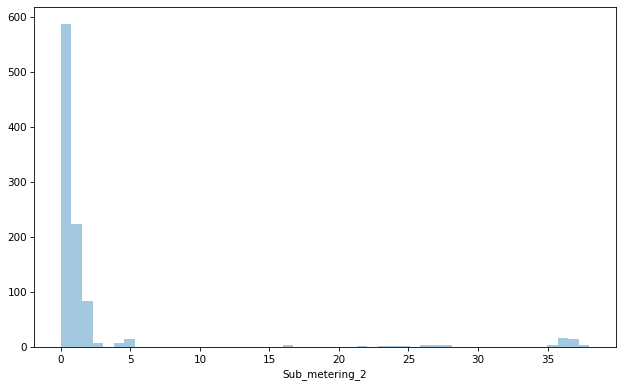

In [9]:
plt.figure(figsize=(10,6),dpi=75)
sns.distplot(power['Sub_metering_2'],kde=False)
plt.show()

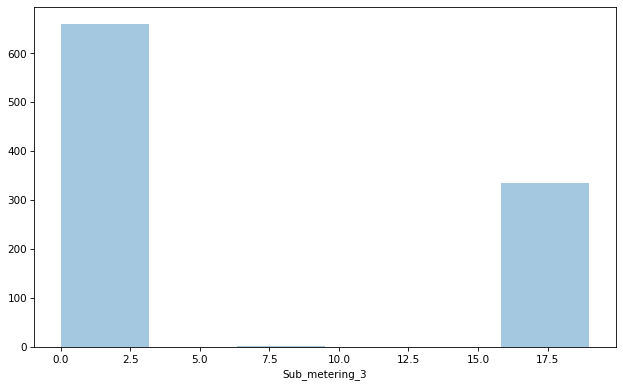

In [10]:
plt.figure(figsize=(10,6),dpi=75)
sns.distplot(power['Sub_metering_3'],kde=False)
plt.show()

It is conformed that the graph is right skewed

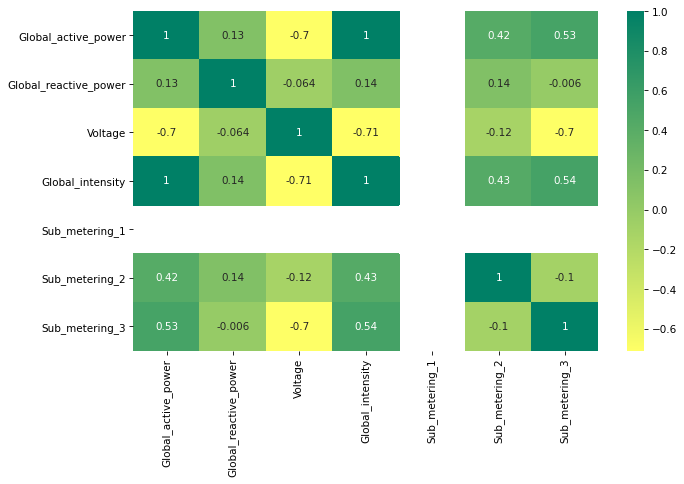

In [12]:
#lets see if there is any correation between varibales
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(power.corr(),cmap='summer_r',cbar=True,annot=True)
plt.show()

- Sub_metering_1 is white in color , because all the values are zero, so we will drop that row.
- Global_reactive_power has little correlation with remaining varibales , so we will drop that too.
-volatge seems to be very important varibale in the dataset, so we will keep it.

In [0]:
#lets drop global_reactive_power and Sub_metering_1 from the dataset
power = power.drop(['Sub_metering_1','Global_reactive_power'],axis=1)

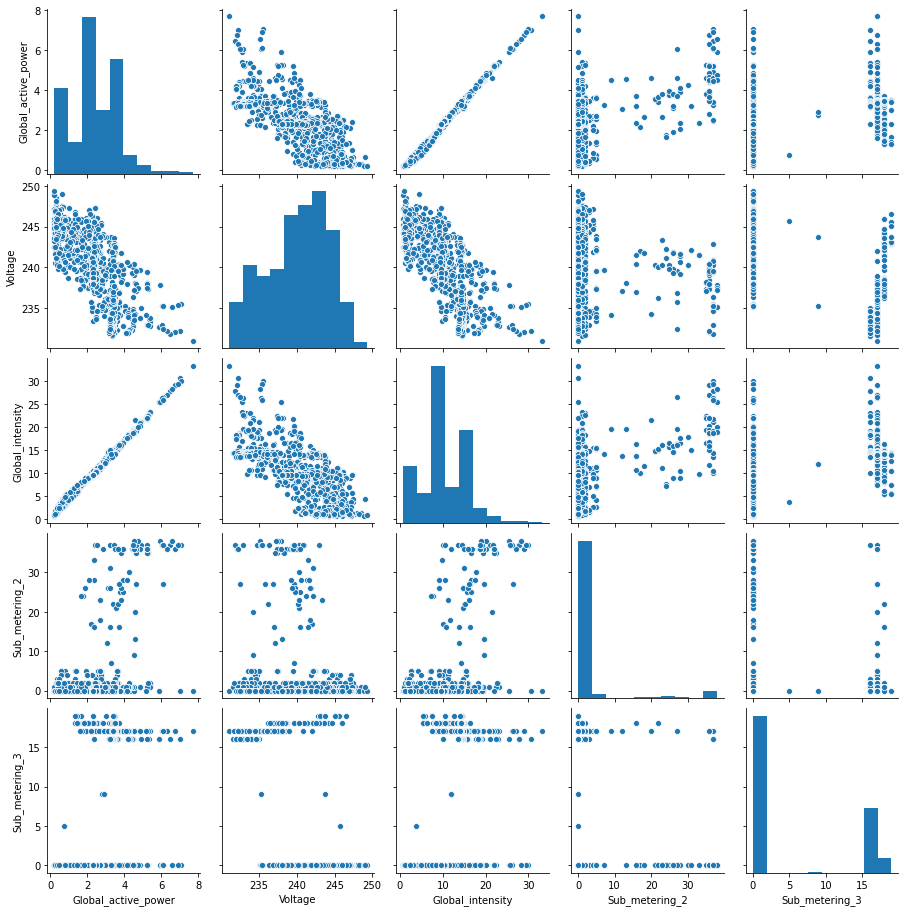

In [17]:
#lets plot a pairplot
sns.pairplot(power)

In [0]:
#we need to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(power)
power_scaled = scaler.transform(power)

In [0]:
power_scaled = pd.DataFrame(data=power_scaled,columns=power.columns)

In [24]:
power_scaled

,Global_active_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
0,1.450106,-1.272945,1.572266,-0.216170,1.396969
1,2.372823,-1.569248,2.470474,-0.216170,1.272863
2,2.384115,-1.652506,2.470474,-0.092768,1.396969
3,2.395407,-1.542311,2.470474,-0.216170,1.396969
4,1.006491,-1.067247,1.064583,-0.216170,1.396969
...,...,...,...,...,...
994,-0.104964,-0.477091,-0.146046,-0.339572,-0.712833
995,-0.098512,-0.467296,-0.146046,-0.339572,-0.712833
996,-0.101738,-0.491784,-0.146046,-0.339572,-0.712833
997,-1.651968,0.054295,-1.551938,-0.339572,-0.712833


In [0]:
from sklearn.cluster import KMeans

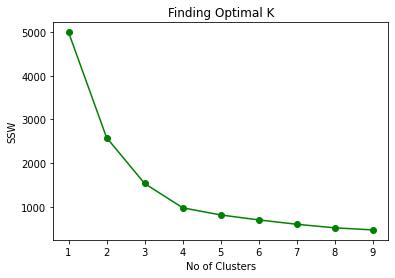

In [29]:
#lets find the optimal k value by elbow method
optimal_k = []
k_values= range(1,10)
for i in k_values:
  model = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=4)
  model.fit(power_scaled)
  optimal_k.append(model.inertia_)



optimal_k = pd.DataFrame(data=optimal_k,index=k_values,columns=['Sum of Squares Within'])

plt.plot(optimal_k,marker='o',color='green')
plt.xlabel('No of Clusters')
plt.ylabel('SSW')
plt.title('Finding Optimal K')
plt.show()

We will take optimal k value as 3 , because after there is not much change in the dataset.

In [30]:
#lets take n_clusters value as 3 and rerun it
model1 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=4)
model1.fit(power_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [31]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
#lets add the labels column to dataset
power_scaled = power_scaled.drop('Cluster',axis=1)

In [0]:
clusters = model1.labels_

In [0]:
y_pred = model1.predict(power_scaled)

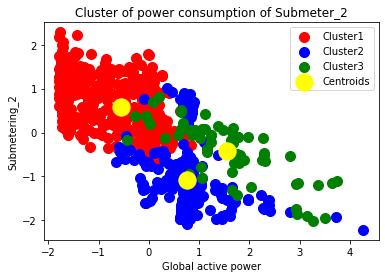

In [46]:
plt.scatter(power_scaled.values[y_pred == 0,0],power_scaled.values[y_pred == 0,1],s=100,c='red',label='Cluster1')
plt.scatter(power_scaled.values[y_pred == 1,0],power_scaled.values[y_pred == 1,1],s=100,c='blue',label='Cluster2')
plt.scatter(power_scaled.values[y_pred == 2,0],power_scaled.values[y_pred == 2,1],s=100,c='green',label='Cluster3')
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of power consumption of Submeter_2')
plt.xlabel('Global active power')
plt.ylabel('Submetering_2')
plt.legend(loc='best')
plt.show()

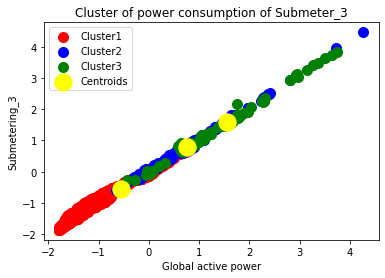

In [47]:
plt.scatter(power_scaled.values[y_pred == 0,0],power_scaled.values[y_pred == 0,2],s=100,c='red',label='Cluster1')
plt.scatter(power_scaled.values[y_pred == 1,0],power_scaled.values[y_pred == 1,2],s=100,c='blue',label='Cluster2')
plt.scatter(power_scaled.values[y_pred == 2,0],power_scaled.values[y_pred == 2,2],s=100,c='green',label='Cluster3')
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,2],s=300,c='yellow',label='Centroids')
plt.title('Cluster of power consumption of Submeter_3')
plt.xlabel('Global active power')
plt.ylabel('Submetering_3')
plt.legend(loc='best')
plt.show()